## 데이터 분석 실습 (DSschool)

In [2]:
import pandas as pd
import numpy as np
import sqlite3

### 데이터 불러오기

#### 1. 데이터베이스에서 설문조사 결과를 불러와서 사용자와 질문을 기준으로 정렬

설문조사 결과를 분석하여, 사람들의 관심이 있는지 파악하려고 한다. 어떤 강의를 우선적으로 오픈할지 결정할 수도 있으며, 어떤 내용의 자료를 수강생에가 보여줄지 결정할 수 있음. 중복응답이 가능한 설문조사라서, 보기좋게 정리되어 있지 않음. 그래서 응답한 사람과 질문 번호 순으로 정렬해야 함.

In [3]:
pd.options.display.max_columns = 50

In [4]:
# data/02_transaction 폴더의 dsschool.db에 접속
connect = sqlite3.connect('data/02_transaction/dsschool.db')
connect

In [5]:
# surveys 테이블의 모든 컬럼을 가져오는 쿼리를 작성 후 read_sql로 불러오기
query = "SELECT * FROM 'surveys'"

surveys = pd.read_sql(query, connect)

print(surveys.shape)
surveys.head(5)

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356


surveys를 user_id와 question_id, 그리고 created_at를 기준으로 정렬하되, user_id를 우선으로 정렬

In [6]:
surveys = surveys.sort_values(["user_id", "question_id","created_at"])
surveys.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639


#### 2. Survey 정보를 cleaning
  
1. answer의 't', 'f'를 True, False로 변환
2. created_at과 updated_at을 datetime 형식으로 변환
3. 같은 user_id가 여러번의 설문조사를 응답한 경우 제거

In [7]:
# answer의 t 값과 f값을 True, False로 변환하는 코드를 작성하고 원본 데이터를 그대로 두고 새로운 컬럼을 만들기

for i in range(1, 13):
    old_columns = f"answer{i}_selected"
    new_columns = f"answer{i}_selected(bool)"
    surveys[new_columns] = (surveys[old_columns] == "t")
    
print(surveys.shape)
surveys.head()

(136063, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


In [8]:
# created_at과 updated_at을 datetime 자료형으로 변환
surveys["created_at"] = pd.to_datetime(surveys["created_at"])
surveys["updated_at"] = pd.to_datetime(surveys["updated_at"])

surveys.dtypes

survey_id                          object
user_id                            object
question_id                         int64
answer1_selected                   object
answer2_selected                   object
answer3_selected                   object
answer4_selected                   object
answer5_selected                   object
answer6_selected                   object
answer7_selected                   object
answer8_selected                   object
answer9_selected                   object
answer10_selected                  object
answer11_selected                  object
answer12_selected                  object
created_at                 datetime64[ns]
updated_at                 datetime64[ns]
answer1_selected(bool)               bool
answer2_selected(bool)               bool
answer3_selected(bool)               bool
answer4_selected(bool)               bool
answer5_selected(bool)               bool
answer6_selected(bool)               bool
answer7_selected(bool)            

In [9]:
# 같은 유저가 여러번 설문조사를 응답한 경우를 제거

print(surveys.shape)

surveys = surveys.drop_duplicates(['user_id', 'question_id'], keep='last')

print(surveys.shape)
surveys.head()

(136063, 29)
(93481, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.192710,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


#### 3. 데이터베이스에서 결제정보 불러와서 연락처와 수업정보 정리

In [10]:
# 데이터베이스의 payments 테이블에서 데이터를 읽어오기
query = "SELECT * FROM 'payments'"

payments = pd.read_sql(query, connect)
print(payments.shape)
payments.head()

(937, 9)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료


연락처의 양식을 010-xxxx-xxxx으로 맞춰주기. 단, 010으로 시작하지 않는 전화번호는 NaN값으로 처리

In [13]:
# 010이나 +82로 시작하는 번호선택
# +의 경우 문자 내에서 특정한 역할을 수행하기 때문에 이를 무력화 시켜주는 역슬래시(\)를 사용 
valid_phone_number = payments["연락처"].str.contains("010|\+82")

payments["연락처(clean)"] = payments["연락처"]

payments[["연락처", "연락처(clean)"]].head()

,연락처,연락처(clean)
0,01056007186,01056007186
1,01050015510,01050015510
2,01044158112,01044158112
3,01065775220,01065775220
4,010-6433-3577,010-6433-3577


In [14]:
valid_phone_number.head()

0    True
1    True
2    True
3    True
4    True
Name: 연락처, dtype: bool

In [15]:
# 010이나 +082로 시작하지 않는 전화번호는 결측치로 변경

payments.loc[~valid_phone_number, "연락처(clean)"] = pd.np.nan

print(payments.shape)
payments.loc[~valid_phone_number, ["연락처", "연락처(clean)"]].head()

(937, 10)


,연락처,연락처(clean)
176,asdasda,NaN
261,0thed0nonn,NaN
707,123131,NaN
708,16474540316,NaN
843,Mana,NaN


각 행, 또는 각 열에 스스로 만든 함수를 사용하고 싶은 경우에는 apply, map, applymap을 사용

연락처의 각 데이터에 대쉬 (-)를 사이사이에 넣는 작업을 할 수 있는 함수를 만들어 apply, map, applymap 등을 사용

In [16]:
# 대시(-)가 있으면 그대로 반환, 없으면 대시를 넣어주는 함수
def clean_phone_number(phone_number):
    if pd.isnull(phone_number):
        return pd.np.nan
    if "-" in phone_number:
        return phone_number
    else:
        phone_number = phone_number[0:3] + "-" + phone_number[3:7] + '-' + phone_number[7:]
        
        return phone_number

payments["연락처(clean)"] = payments["연락처(clean)"].apply(clean_phone_number)

print(payments.shape)
payments[["연락처", "연락처(clean)"]].head()

(937, 10)


,연락처,연락처(clean)
0,01056007186,010-5600-7186
1,01050015510,010-5001-5510
2,01044158112,010-4415-8112
3,01065775220,010-6577-5220
4,010-6433-3577,010-6433-3577


In [17]:
phone_number = "01012341234"
clean_phone_number(phone_number)

'010-1234-1234'

string 메소드를 사용해서 신청 수업을 쪼개어 수업타입과 기수를 만듬

split을 이용하여 띄어쓰기 별로 데이터를 분리한 뒤, 마지막 단어는 기수, 그 앞의 모든 단어들은 수업타입으로 만들 수 있음

In [22]:
# - 기준으로 쪼개기
print('010-1234-5678'.split('-'))

# 공백기준으로 쪼개기
print('입문 속성반 14기'.split())

['010', '1234', '5678']
['입문', '속성반', '14기']


In [21]:
#뒤의 2개를 붙이고 싶은 경우 붙이는 ''.join()을 이용
example_list = ['입문', '속성반', '14기']

print(''.join(example_list[1:]))

print('--'.join(example_list[1:]))

속성반14기
속성반--14기


신청수업을 띄어쓰기를 기준으로 split, 그리고 이를 이용하여 수업타입과 기수를 분리

In [23]:
def find_course_type(course_name):
    return course_name.split()[0]

def find_course_id(course_name):
    return course_name.split()[1]

In [24]:
find_course_type("입문반 22기")

'입문반'

In [25]:
find_course_id("입문반 22기")

'22기'

In [26]:
#Write your code here!
payments["수업타입"] = payments["신청수업"].apply(find_course_type)
payments["기수"] = payments["신청수업"].apply(find_course_id)

payments[["신청수업", "수업타입","기수"]].head()

,신청수업,수업타입,기수
0,입문반 22기,입문반,22기
1,중급반 5기,중급반,5기
2,입문반 22기,입문반,22기
3,입문반 22기,입문반,22기
4,중급반 5기,중급반,5기


#### 4. 2018년 이후 결제 정보를
    
1. 날짜 컬럼을 datetime 자료로 바꾸기
2. 결제가 완료된 경우 True, 아닌 경우 False인 컬럼 생성


In [27]:
payments.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료,010-5001-5510,중급반,5기
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료,010-4415-8112,입문반,22기
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료,010-6577-5220,입문반,22기
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료,010-6433-3577,중급반,5기


In [28]:
# 날짜 컬럼을 datetime 자료로 바꾸기
payments["신청날짜"] = pd.to_datetime(payments["신청날짜"])

payments["신청날짜"].head()

0   2018-01-31 15:42:20
1   2018-01-31 15:29:24
2   2018-01-31 14:04:14
3   2018-01-31 10:18:19
4   2018-01-30 19:12:54
Name: 신청날짜, dtype: datetime64[ns]

In [30]:
payments["상태"].unique()

array(['결제 완료', '처리 중'], dtype=object)

In [31]:
#결제가 완료된 경우 True, 아닌 경우 False인 컬럼 생성
payments["상태(bool)"] = payments["상태"] == "결제 완료"

payments[["상태","상태(bool)"]].head()

,상태,상태(bool)
0,결제 완료,True
1,결제 완료,True
2,결제 완료,True
3,결제 완료,True
4,결제 완료,True


#### 5. 결제 데이터에서 신청날짜 칼럼을 이용하여 월, 일, 요일, 시간 칼럼을 추가 하고 금액 정보를 int형으로 변환

In [32]:
payments["신청날짜(연)"] = payments["신청날짜"].dt.year
payments["신청날짜(월)"] = payments["신청날짜"].dt.month
payments["신청날짜(일)"] = payments["신청날짜"].dt.day
payments["신청날짜(시)"] = payments["신청날짜"].dt.hour
payments["신청날짜(분)"] = payments["신청날짜"].dt.minute
payments["신청날짜(초)"] = payments["신청날짜"].dt.second
payments["신청날짜(요일)"] = payments["신청날짜"].dt.weekday_name
payments[["신청날짜", "신청날짜(연)", "신청날짜(월)", "신청날짜(일)", "신청날짜(시)", "신청날짜(분)", "신청날짜(초)", "신청날짜(요일)"]].head()

,신청날짜,신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일)
0,2018-01-31 15:42:20,2018,1,31,15,42,20,Wednesday
1,2018-01-31 15:29:24,2018,1,31,15,29,24,Wednesday
2,2018-01-31 14:04:14,2018,1,31,14,4,14,Wednesday
3,2018-01-31 10:18:19,2018,1,31,10,18,19,Wednesday
4,2018-01-30 19:12:54,2018,1,30,19,12,54,Tuesday


In [28]:
payments["금액"].dtypes

dtype('O')

In [33]:
# 정의를 이용한 방법
def clean_price(price):
    price = price.replace(",", "")
    price = int(price)
    return price

clean_price("495,000")

495000

In [34]:
payments["금액(int)"] = payments["금액"].apply(clean_price)

payments[["금액", "금액(int)"]].head()

,금액,금액(int)
0,"495,000",495000
1,"594,000",594000
2,"495,000",495000
3,"495,000",495000
4,"594,000",594000


In [31]:
# str.replace 를 이용한 방법

payments["금액(int)"] = payments["금액"].str.replace(',', '').astype(int)
payments["금액(int)"].head()

In [35]:
payments[["신청날짜", "신청날짜(연)", "신청날짜(월)", "신청날짜(일)", "신청날짜(시)", "신청날짜(분)", "신청날짜(초)", "신청날짜(요일)", "금액", "금액(int)"]].head()

,신청날짜,신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액,금액(int)
0,2018-01-31 15:42:20,2018,1,31,15,42,20,Wednesday,"495,000",495000
1,2018-01-31 15:29:24,2018,1,31,15,29,24,Wednesday,"594,000",594000
2,2018-01-31 14:04:14,2018,1,31,14,4,14,Wednesday,"495,000",495000
3,2018-01-31 10:18:19,2018,1,31,10,18,19,Wednesday,"495,000",495000
4,2018-01-30 19:12:54,2018,1,30,19,12,54,Tuesday,"594,000",594000


#### 6. 요일별, 시간별 결제량의 차이를 구하기

결제 패턴을 분석해 어떤 시간대에 결제가 높게 발생하는지 안다면 도움이 될것.

In [57]:
table = payments.pivot_table(values = '금액(int)', index = '신청날짜(요일)', aggfunc = ["sum", "count"])

# 월화수목금토일 순으로 보이게 하기
dayname = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

table.loc[dayname]

,sum,count
,금액(int),금액(int)
신청날짜(요일),,
Monday,91184000,145
Tuesday,78183000,128
Wednesday,100303000,170
Thursday,102165000,175
Friday,86818000,155
Saturday,44337000,76
Sunday,54212000,88


평일이 주말에 비해 결제량이 높음

이를 시간별 결제량과 연결

In [38]:
# 시각에 따른 피벗테이블
payments.pivot_table(values = '금액(int)', index = '신청날짜(시)', aggfunc = ["sum", "count"])

,sum,count
,금액(int),금액(int)
신청날짜(시),,
0,19962000,35
1,9663000,16
2,5699000,9
3,3122000,5
4,4066000,6
5,2033000,3
6,6251000,8
7,5643000,11


주로 업무시간에 결제가 많이 발생하는 것을 알 수 있음.

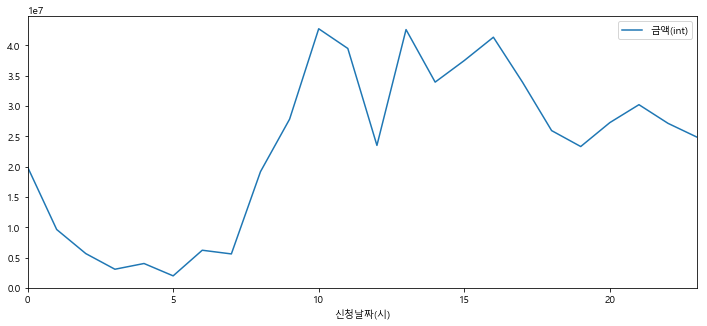

In [39]:
# 시각화를 통해 그래프 그려서 확인

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'Malgun Gothic'

payments.pivot_table(values = '금액(int)', index = '신청날짜(시)', aggfunc = 'sum').plot(figsize=[12,5])

#### 7. 설문조사 결과를 바탕으로 오픈할 강의의 우선순위 선정

1번, 3번 질문에 대한 응답을 정리

In [35]:
surveys.head()

,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.192710,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


In [36]:
surveys["question_id"].head()

73176    1
73168    2
73177    3
73184    4
73185    5
Name: question_id, dtype: int64

In [40]:
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

print(len(answer_list))
answer_list

12


['answer1_selected(bool)',
 'answer2_selected(bool)',
 'answer3_selected(bool)',
 'answer4_selected(bool)',
 'answer5_selected(bool)',
 'answer6_selected(bool)',
 'answer7_selected(bool)',
 'answer8_selected(bool)',
 'answer9_selected(bool)',
 'answer10_selected(bool)',
 'answer11_selected(bool)',
 'answer12_selected(bool)']

In [44]:
surveys_pivot = pd.pivot_table(surveys, index = 'question_id', values = answer_list, aggfunc = pd.np.mean, dropna = False)

surveys_pivot

,answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool)
question_id,,,,,,,,,,,,
1,0.000000,0.000000,0.00000,0.321978,0.093082,0.238010,0.074705,0.272225,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.533931,0.240957,0.105157,0.119955,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.173421,0.356281,0.12368,0.372238,0.313507,0.211327,0.371489,0.244438,0.215821,0.141958,0.437186,0.103079
4,0.000000,0.000000,0.00000,0.072729,0.674631,0.252640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.00000,0.098359,0.158813,0.393737,0.349090,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.00000,0.216447,0.252846,0.482175,0.454389,0.554149,0.431096,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.00000,0.750338,0.249662,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [46]:
surveys_pivot = surveys_pivot[answer_list].loc[[1,3]]
surveys_pivot

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.321978,0.093082,0.238010,0.074705,0.272225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.372238,0.313507,0.211327,0.371489,0.244438,0.215821,0.141958,0.437186,0.103079,0.173421,0.356281,0.12368


1번 질문에는 1번 응답, 3번 질문에서는 8번이 가장 높은 응답

surveys 테이블과 payments 테이블을 병합할 필요가 있음

#### 8. 결제 데이터와 유저 데이터에는 payment_id 가 각각 있고, 유저 데이터와 설문조사 데이터에는 user_id가 각각 존재함. 각자 가져와서 merge 실행

users 테이블을 불러와서 payments와 users가 병합된 테이블에 다시 surveys를 병합하며, 모든 병합은 inner로 진행

In [47]:
query = "SELECT * FROM 'users'"

users = pd.read_sql(query, connect)

print(users.shape)
users.head(5)

(48030, 4)


,user_id,mixpanel_id,payment_id,email
0,2q0ucs4kiiko,DLDEBFOWFZMCIWXRWZZLGULCHTPPYZTDPSTFMZCQUPNNZS...,None,c4l74sjvhybg@dsschool.co.kr
1,n5yxumr8w20w,TCCZWHROYZCUABWOHIXIYDSLKYPQHLUGVYYLTDAQETOEEF...,None,wgkwoep07x26@dsschool.co.kr
2,tjzjbj2awswz,BBRFELKWMCNGYXSFZKPCUXXAAVJZHMDHRZKZKXSDIRDIFS...,None,64elpdsxe0wz@dsschool.co.kr
3,xvt93f37om9q,TKBAYLPGJKWLUGKZQVBJEKKMIZULJIAVUUFBXMZIEPGXGB...,None,hgvkoilokgfq@dsschool.co.kr
4,smsnz99ugq3q,PAAVHVFEYHJZUWNYRDVEXWXXLLVVAWNJDIRSQTQYGXQLAK...,None,5ztx2nzuitjg@dsschool.co.kr


In [49]:
#payments와 users를 병합
data = (payments.merge(users, left_on = '이메일', right_on = 'email', how = 'inner'))

#surveys와는 user_id를 기준으로 병합
data = (data.merge(surveys, on = 'user_id', how = 'inner'))

print(data.shape)
data.head(3)

(3035, 53)


,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int),user_id,mixpanel_id,payment_id_y,email,...,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,t,f,f,f,None,None,None,None,None,None,None,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156,False,True,False,False,False,False,False,False,False,False,False,False
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,None,None,None,None,None,None,None,None,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754,False,False,False,True,False,False,False,False,False,False,False,False
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,t,f,f,f,f,f,t,f,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897,False,False,False,True,True,False,False,False,False,False,True,False


#### 9. 결제 데이터와 유저 데이터에는 e-mail이 각각 있고, 유저 데이터와 설문조사 데이터에는 user_id 가 각각 존재함. 각자 가져와서 SQL join으로 합치기

In [50]:
#`SELECT () FROM () INNER JOIN () ON () INNER JOIN () ON ()`  구조의 쿼리문 작성
query = """
    SELECT * FROM 'payments'\
    INNER JOIN 'users'\
    ON 'payments'.이메일 ='users'.email\
    INNER JOIN 'surveys'\
    ON 'users'.user_id = 'surveys'.user_id
"""

payments_users_serveys = pd.read_sql(query, connect)
payments_users_serveys.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,user_id,mixpanel_id,payment_id,email,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,5vtq11wow61w,한서훈,3xy4zzr6k13x@dsschool.co.kr,01040513577,2018-01-03 14:44:12,입문반 19기,"495,000",카드결제,결제 완료,orqcrchp0s2a,OJRXJURAXLJMMAWURTWSNBUJIRJJIVSHDHBBBPORBVRPPQ...,None,3xy4zzr6k13x@dsschool.co.kr,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,209h7wqy7bdf,김재호,ao6kez00wxnh@dsschool.co.kr,010-6880-0251,2017-10-22 08:53:29,입문반 11기,"495,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152
2,uh701zm4irgx,김재호,ao6kez00wxnh@dsschool.co.kr,010-7202-2433,2017-12-21 16:47:00,딥러닝 2기,"1,043,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152
3,8vpohybxjxld,이민국,nd5i4157vo2k@dsschool.co.kr,010-6215-4832,2018-01-20 13:18:45,딥러닝 2기,"1,043,000",카드결제,결제 완료,dcnz8pmph34i,NDMOCEUGYGEAWKWDEKHSNBYRXNQJAEEESMIQUNVYYHFKJI...,None,nd5i4157vo2k@dsschool.co.kr,c4ir6lwzgkd4,dcnz8pmph34i,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-19 02:43:44.446664,2018-01-19 02:43:44.446664
4,x6n32merwsyv,이민국,nd5i4157vo2k@dsschool.co.kr,010-7681-3527,2018-01-19 13:31:11,입문반 21기,"495,000",카드결제,결제 완료,dcnz8pmph34i,NDMOCEUGYGEAWKWDEKHSNBYRXNQJAEEESMIQUNVYYHFKJI...,None,nd5i4157vo2k@dsschool.co.kr,c4ir6lwzgkd4,dcnz8pmph34i,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-19 02:43:44.446664,2018-01-19 02:43:44.446664


---

#### 10. 8번에서 merging한 데이터 중 필요한 컬럼 추리기

In [52]:
data.head()

,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int),user_id,mixpanel_id,payment_id_y,email,...,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,t,f,f,f,None,None,None,None,None,None,None,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156,False,True,False,False,False,False,False,False,False,False,False,False
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,None,None,None,None,None,None,None,None,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754,False,False,False,True,False,False,False,False,False,False,False,False
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,t,f,f,f,f,f,t,f,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897,False,False,False,True,True,False,False,False,False,False,True,False
3,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,t,None,None,None,None,None,None,None,None,None,2018-01-31 06:15:52.621368,2018-01-31 06:15:52.621368,False,False,True,False,False,False,False,False,False,False,False,False
4,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,2018,1,31,15,42,20,Wednesday,495000,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,t,f,f,None,None,None,None,None,None,None,None,2018-01-31 06:16:00.043586,2018-01-31 06:16:00.043586,False,True,False,False,False,False,False,False,False,False,False,False


In [53]:
# 분석에 필요한 컬럼들의 리스트
selected_columns = ['user_id',  '이름', '연락처(clean)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜', '상태(bool)', 'mixpanel_id']

selected_columns += [
    'question_id',
    'answer1_selected(bool)', 'answer2_selected(bool)', 'answer3_selected(bool)',
    'answer4_selected(bool)', 'answer5_selected(bool)', 'answer6_selected(bool)',
    'answer7_selected(bool)', 'answer8_selected(bool)', 'answer9_selected(bool)',
    'answer10_selected(bool)', 'answer11_selected(bool)', 'answer12_selected(bool)'
]

selected_columns += [
    'created_at', 'updated_at'
]

#위의 리스트를 이용하여 데이터에 필요한 컬럼만 남기기.
data = data[selected_columns]
data.head()

,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
0,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,1,False,True,False,False,False,False,False,False,False,False,False,False,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156
1,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,2,False,False,False,True,False,False,False,False,False,False,False,False,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754
2,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,3,False,False,False,True,True,False,False,False,False,False,True,False,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897
3,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,4,False,False,True,False,False,False,False,False,False,False,False,False,2018-01-31 06:15:52.621368,2018-01-31 06:15:52.621368
4,drdi7xmsj0nm,고세준,010-5600-7186,0usbs4knns0s@dsschool.co.kr,입문반 22기,495000,카드결제,2018-01-31 15:42:20,True,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,5,False,True,False,False,False,False,False,False,False,False,False,False,2018-01-31 06:16:00.043586,2018-01-31 06:16:00.043586


결제 이후에 설문조사를 한 경우 있고 한 사람이 여러번 설문조사를 한 경우가 있으므로 결제를 한 이후에도 설문조사를 한 경우는 삭제하며 여러번 설문조사를 한 경우는 첫번째 설문 조사만 남기고 남은 중복정보를 제거

먼저 신청날짜와 created_at 컬럼을 이용하여 결제를 한 이후에도 설문조사를 한 경우는 삭제. 또한, 이메일과 신청수업, question_id 3개가 중복되는 경우는 최신의 정보만 남김. 단 중복제거하기 전에 "이메일", "question_id", "created_at" 컬럼을 기준으로 sorting 할 것

In [54]:
#신청날짜가 created_at보다 크거나 같은 경우만 남김. 결제를 한 이후에도 설문조사를 한 경우를 배제하기 위해서
data = data[data['신청날짜'] >= data['created_at']]

In [55]:
# 이메일과 신청수업, question_id가 중복되는 경우는 drop_duplicates를 이용해 첫 정보만 남김

data = data.sort_values(by = ["이메일", "question_id", "created_at"])
data = data.drop_duplicates(['이메일', '신청수업', "question_id"], keep = 'last')

print(data.shape)
data.head()

(1092, 25)


,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
887,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:38.247526,2018-01-17 06:31:38.247526
888,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112
889,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999
890,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555
891,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,5,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:32:03.640220,2018-01-17 06:32:03.640220


#### 11. 위에서 정리한 결과를 바탕으로 결제를 한 사람들의 설문조사 1,3번 응답결과를 정리

In [59]:
# 피벗테이블을 이용하여 실제로 결제를 한 사람들의 1,3번 질문 대답 정리
surveys_pivot_purchased = pd.pivot_table(data,
                                 index = 'question_id',
                                 values = answer_list,
                                 aggfunc = 'mean')

surveys_pivot_purchased = table_purchased[answer_list].loc[[1,3]]

surveys_pivot_purchased

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.314103,0.115385,0.262821,0.076923,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.474359,0.391026,0.269231,0.429487,0.294872,0.262821,0.217949,0.410256,0.121795,0.211538,0.391026,0.147436


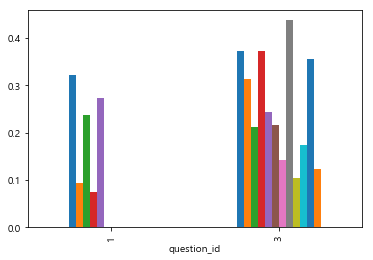

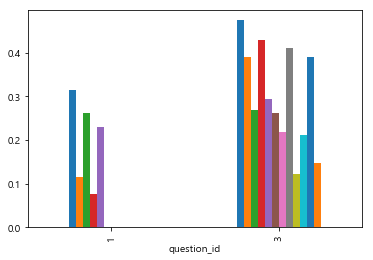

In [60]:
# 시각화를 통해 그래프 그려서 확인
import seaborn as sns
import matplotlib.pyplot as plt

surveys_pivot.plot(kind = 'bar', legend = False)

table_purchased.plot(kind = 'bar', legend = False)

#### 12. DS School 홈페이지에 처음 접근한 순간부터 결제까지 걸린 시간을 계산

In [61]:
time = data['신청날짜'] - data['created_at']
time.head()

887   09:14:16.752474
888   09:14:12.718888
889   09:13:59.302001
890   09:13:55.157445
891   09:13:51.359780
dtype: timedelta64[ns]

09:14:16의 경우에는 9시간 14분 16초 걸렸다는 의미

그래프화 하기 위해 .dt를 이용하여 일 단위

In [62]:
#time.dt.components 를 이용하여 해당 시간의 정보확인
time.dt.components.head(2)

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
887,0,9,14,16,752,474,0
888,0,9,14,12,718,888,0


In [63]:
time_int = time.dt.components['days'] + time.dt.components['hours'] / 24 + time.dt.components['minutes'] / (24 * 60) + time.dt.components['seconds'] / (24 * 60 * 60)

time_int.head()

887    0.384907
888    0.384861
889    0.384711
890    0.384664
891    0.384618
dtype: float64

In [64]:
# 또는 dt.total_seconds() 를 이용
(time.dt.total_seconds() / (60 * 60 * 24)).head()

887    0.384916
888    0.384869
889    0.384714
890    0.384666
891    0.384622
dtype: float64

In [65]:
# seconds를 이용
(time.dt.seconds / (60 * 60 * 24)).head()

887    0.384907
888    0.384861
889    0.384711
890    0.384664
891    0.384618
dtype: float64

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})

(0, 25)

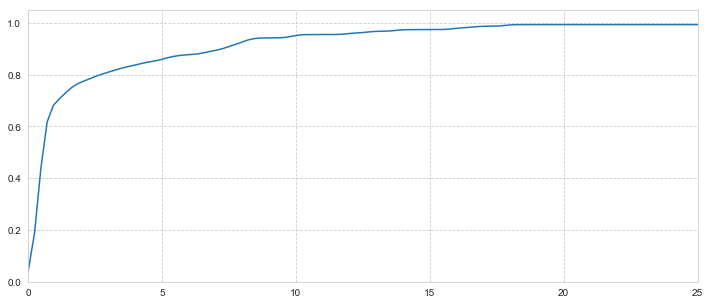

In [68]:
plt.figure(figsize=[12,5])
ax = sns.distplot(time_int,
                  hist=False,
                  #hist_kws=dict(cumulative=True),
                  kde_kws={'cumulative' : True})

ax.set_xlim(0, 25)

위의 분포를 통해 결제를 한 사람들 중 80% 이상이 10일 이내 결제, 그리고 나머지 20%는 훨씬 뒤에 결제

#### 14. 믹스패널 데이터를 불러와서 users와 payments 테이블과 병합

In [70]:
mixpanel_data = pd.read_csv('data/02_transaction/mixpanel_people_profiles_revised.csv')

print(mixpanel_data.shape)
mixpanel_data.head()

(17902, 20)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id
0,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-16T22:00:21,iOS,Facebook Mobile,Seoul,KR,VGGPBLBXCDGZOSCVCODTNZBICKURLVAFKASUMZCNZQHEIU...
1,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-19T19:03:36,iOS,Mobile Safari,Incheon,KR,TIKFTLTMQQLYMKSDPCFCPNSOLHKLOQWQMIMKXBRUPVKEOD...
2,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-21T23:34:02,Windows,Firefox,Seoul,KR,WMFONVUFEIFDJOOZWJHPMTRKPDMKHPDBQSYKYTACHVODOL...
3,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T07:43:58,iOS,Facebook Mobile,Seoul,KR,DYXLHORZUNPSZSEXOIRNGCZWMEHHNKCTACJOFEEWEAFYVX...
4,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T15:03:48,Android,Chrome,Seoul,KR,BRQEHDPQRESBAIAURZIPTHTPDMJZSBBNACVCNMQFGXVXIP...


In [71]:
mixpanel_payments = (mixpanel_data.merge(users, how='inner', left_on='distinct_id', right_on='mixpanel_id'))
mixpanel_payments = (mixpanel_payments.merge(payments, how='left', on='payment_id'))
    
print(mixpanel_payments.shape)
print(mixpanel_data.shape)

mixpanel_payments.head()

(13875, 44)
(17902, 20)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
0,NaN,2017-09-01T09:27:57,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-01T09:30:07,Android,Chrome,Seoul,KR,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,j81umpsxbqer,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,None,xgyd2m7cz1tz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2017-09-25T11:08:25,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-25T11:08:33,Windows,Chrome,Seoul,KR,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,gc3riqbpec5a,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,None,ww4rloe4l6to@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2017-11-27T16:59:25,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-11-27T16:59:36,iOS,Facebook Mobile,Seoul,KR,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,h47v07u6u5zm,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,None,i97zkjstv1mz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-11-30T15:44:16,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-11-30T15:44:27,Windows,Internet Explorer,Suwon-si,KR,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,v6ln67rwsqo4,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,86dpwpocr5gi,w2gcxxhaam4s@dsschool.co.kr,이초현,g8zyxqrdgcgf@dsschool.co.kr,01088615300,2017-12-17 09:26:56,중급반 4기,"594,000",카드결제,결제 완료,010-8861-5300,중급반,4기,True,2017.0,12.0,17.0,9.0,26.0,56.0,Sunday,594000.0
4,NaN,2018-01-01T16:03:02,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2018-01-01T16:03:09,Windows,Chrome,Seoul,KR,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,mbwhfxfmmowu,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,None,rnippqcfcr09@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 15. 믹스패널 데이터를 바탕으로 캠페인별 유입 id의 수에 비해 결제 비율이 가장 높은 광고 캠페인 찾기

In [73]:
# utm_campaign [first touch]의 경우 해당 고객이 '처음'으로 유입된 캠페인이 무엇인지에 대한 정보
# 해당 컬럼이 비어있지 않은 데이터만 남기기
mixpanel_payments = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].notnull()]

mixpanel_payments

,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
26,NaN,NaN,$direct,$none,NaN,onlinelive2,onlinelive2,$none,NaN,email,email,$none,NaN,$direct,2018-07-27T18:50:33,Windows,Chrome,Chuncheon,KR,VPLKSJFSHUEQNEZMFERNTSJTNDTJLIQFHAFFEUBZFBGRRO...,4yvsxymjft8x,VPLKSJFSHUEQNEZMFERNTSJTNDTJLIQFHAFFEUBZFBGRRO...,None,fgti86xslyo7@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,m.facebook.com,yujin,yujin,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://m.facebook.com,2018-05-10T00:09:45,iOS,Facebook Mobile,Suwon,KR,UBZMNQQVCQOFVNTLGFIICQQKDHSWPVFPSAFRQMAZGWQHJM...,5gd1ohnllzsu,UBZMNQQVCQOFVNTLGFIICQQKDHSWPVFPSAFRQMAZGWQHJM...,None,wem1zl2jfiu5@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,instagram.com,yujin,yujin,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://instagram.com/,2018-05-11T09:05:13,Android,Chrome,Seoul,KR,JURAMOULKOEXUIFYRVYNGCQQJCJJZBWEXWYTMSRKQPVHFZ...,gez2ysc496iq,JURAMOULKOEXUIFYRVYNGCQQJCJJZBWEXWYTMSRKQPVHFZ...,None,ugbqu03josj6@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,www.facebook.com,googleio,googleio,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,https://www.facebook.com/,2018-05-11T18:39:57,Windows,Chrome,NaN,KR,ODZIRNKWANNDKNPQSVPEHLMITFVOSXGPFXJYLQZGHJGYYK...,r4ywxwpj1cge,ODZIRNKWANNDKNPQSVPEHLMITFVOSXGPFXJYLQZGHJGYYK...,None,cvpbnl3vv7h0@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,$direct,yujin,yujin,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,$direct,2018-05-12T00:02:09,iOS,Facebook Mobile,Suwon,KR,LIJUDODHUHOBJOCKVGMWTHVWNRHCOIVMMJMPOJWTQRLRHN...,z0rl16m1lwfi,LIJUDODHUHOBJOCKVGMWTHVWNRHCOIVMMJMPOJWTQRLRHN...,None,spzscgjn2ucg@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,m.facebook.com,yujin,yujin,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://m.facebook.com,2018-05-12T07:48:23,iOS,Facebook Mobile,Seongnam-si,KR,FRZMCNXKDWURVFCUCCVWEXDTFZGIJZMIIKCIXJIYLHOJWQ...,d7i24dyyp2b6,FRZMCNXKDWURVFCUCCVWEXDTFZGIJZMIIKCIXJIYLHOJWQ...,None,rn9ohhlkyrlt@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,www.facebook.com,ibm2,mailchimp_drip,button02,button02,NaN,NaN,facebook,email,begginer_1st,begginer_1st,https://www.facebook.com/,2018-05-15T10:12:24,Mac OS X,Chrome,Seoul,KR,SINGMWAYLGAUOXSQGMFSGJBQXADJCGXATNJRAMCFDZBLBW...,b7ejjo50odrn,SINGMWAYLGAUOXSQGMFSGJBQXADJCGXATNJRAMCFDZBLBW...,None,gpg76sdx2tm0@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,m.facebook.com,deeplearningtraffic,deeplearningtraffic,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://m.facebook.com/,2018-05-19T03:03:28,Android,Chrome,Seoul,KR,MBKLMHIUREMWJXHBJCFXFOYSYJMTRBACVPOJIQSCXBRWET...,te8tf9oaxww5,MBKLMHIUREMWJXHBJCFXFOYSYJMTRBACVPOJIQSCXBRWET...,None,bm2v5r4zsp2m@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,m.facebook.com,deeplearningtraffic,deeplearningtraffic,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://m.facebook.com,2018-05-21T16:13:04,iOS,Facebook Mobile,Seoul,KR,GUFKOJUHXUBDESSOSTKBCSRMFXSRBWPFAMWXDRNDLKPEAO...,g81hivst1pah,GUFKOJUHXUBDESSOSTKBCSRMFXSRBWPFAMWXDRNDLKPEAO...,None,j1bjm3accq2n@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,$direct,de

In [75]:
#평균을 단순하게 mean으로 연산하기 위해 bool 타입 데이터를 정수형으로 변환

mixpanel_payments.loc[mixpanel_payments['상태(bool)'] == True, '상태(bool)'] = 1
mixpanel_payments.loc[mixpanel_payments['상태(bool)'] != True, '상태(bool)'] = 0

mixpanel_payments.head()

,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
26,NaN,NaN,$direct,$none,NaN,onlinelive2,onlinelive2,$none,NaN,email,email,$none,NaN,$direct,2018-07-27T18:50:33,Windows,Chrome,Chuncheon,KR,VPLKSJFSHUEQNEZMFERNTSJTNDTJLIQFHAFFEUBZFBGRRO...,4yvsxymjft8x,VPLKSJFSHUEQNEZMFERNTSJTNDTJLIQFHAFFEUBZFBGRRO...,None,fgti86xslyo7@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,m.facebook.com,yujin,yujin,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://m.facebook.com,2018-05-10T00:09:45,iOS,Facebook Mobile,Suwon,KR,UBZMNQQVCQOFVNTLGFIICQQKDHSWPVFPSAFRQMAZGWQHJM...,5gd1ohnllzsu,UBZMNQQVCQOFVNTLGFIICQQKDHSWPVFPSAFRQMAZGWQHJM...,None,wem1zl2jfiu5@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,instagram.com,yujin,yujin,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://instagram.com/,2018-05-11T09:05:13,Android,Chrome,Seoul,KR,JURAMOULKOEXUIFYRVYNGCQQJCJJZBWEXWYTMSRKQPVHFZ...,gez2ysc496iq,JURAMOULKOEXUIFYRVYNGCQQJCJJZBWEXWYTMSRKQPVHFZ...,None,ugbqu03josj6@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,www.facebook.com,googleio,googleio,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,https://www.facebook.com/,2018-05-11T18:39:57,Windows,Chrome,NaN,KR,ODZIRNKWANNDKNPQSVPEHLMITFVOSXGPFXJYLQZGHJGYYK...,r4ywxwpj1cge,ODZIRNKWANNDKNPQSVPEHLMITFVOSXGPFXJYLQZGHJGYYK...,None,cvpbnl3vv7h0@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,$direct,yujin,yujin,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,$direct,2018-05-12T00:02:09,iOS,Facebook Mobile,Suwon,KR,LIJUDODHUHOBJOCKVGMWTHVWNRHCOIVMMJMPOJWTQRLRHN...,z0rl16m1lwfi,LIJUDODHUHOBJOCKVGMWTHVWNRHCOIVMMJMPOJWTQRLRHN...,None,spzscgjn2ucg@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# 피벗 테이블을 이용해 utm_campaign [first touch]별 실제 결제 비율 확인

pd.pivot_table(mixpanel_payments, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean').sort_values('상태(bool)', ascending=False).head(10)

,상태(bool)
utm_campaign [first touch],
dsschoolintro,0.333333
dripinsta7,0.066667
kang1,0.066667
5why2,0.055556
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303


campaign으로부터 유입된 고객이 20명 이상인 캠페인만을 이용해 피벗 테이블 작성

In [86]:
campaign = mixpanel_payments['utm_campaign [first touch]'].value_counts()
campaign.head()

$none                  2166
soldout                 643
deeplearningtraffic     632
problem                 327
ryoovideo               264
Name: utm_campaign [first touch], dtype: int64

In [87]:
over20_campaign = campaign[campaign > 20]
over20_campaign.head()

$none                  2166
soldout                 643
deeplearningtraffic     632
problem                 327
ryoovideo               264
Name: utm_campaign [first touch], dtype: int64

In [88]:
# campaign으로부터 20명 이상인 캠페인
over20_data = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].isin(over20_campaign.index)]
over20_data

,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
26,NaN,NaN,$direct,$none,NaN,onlinelive2,onlinelive2,$none,NaN,email,email,$none,NaN,$direct,2018-07-27T18:50:33,Windows,Chrome,Chuncheon,KR,VPLKSJFSHUEQNEZMFERNTSJTNDTJLIQFHAFFEUBZFBGRRO...,4yvsxymjft8x,VPLKSJFSHUEQNEZMFERNTSJTNDTJLIQFHAFFEUBZFBGRRO...,None,fgti86xslyo7@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,m.facebook.com,yujin,yujin,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://m.facebook.com,2018-05-10T00:09:45,iOS,Facebook Mobile,Suwon,KR,UBZMNQQVCQOFVNTLGFIICQQKDHSWPVFPSAFRQMAZGWQHJM...,5gd1ohnllzsu,UBZMNQQVCQOFVNTLGFIICQQKDHSWPVFPSAFRQMAZGWQHJM...,None,wem1zl2jfiu5@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,instagram.com,yujin,yujin,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://instagram.com/,2018-05-11T09:05:13,Android,Chrome,Seoul,KR,JURAMOULKOEXUIFYRVYNGCQQJCJJZBWEXWYTMSRKQPVHFZ...,gez2ysc496iq,JURAMOULKOEXUIFYRVYNGCQQJCJJZBWEXWYTMSRKQPVHFZ...,None,ugbqu03josj6@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,www.facebook.com,googleio,googleio,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,https://www.facebook.com/,2018-05-11T18:39:57,Windows,Chrome,NaN,KR,ODZIRNKWANNDKNPQSVPEHLMITFVOSXGPFXJYLQZGHJGYYK...,r4ywxwpj1cge,ODZIRNKWANNDKNPQSVPEHLMITFVOSXGPFXJYLQZGHJGYYK...,None,cvpbnl3vv7h0@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,$direct,yujin,yujin,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,$direct,2018-05-12T00:02:09,iOS,Facebook Mobile,Suwon,KR,LIJUDODHUHOBJOCKVGMWTHVWNRHCOIVMMJMPOJWTQRLRHN...,z0rl16m1lwfi,LIJUDODHUHOBJOCKVGMWTHVWNRHCOIVMMJMPOJWTQRLRHN...,None,spzscgjn2ucg@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,m.facebook.com,yujin,yujin,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://m.facebook.com,2018-05-12T07:48:23,iOS,Facebook Mobile,Seongnam-si,KR,FRZMCNXKDWURVFCUCCVWEXDTFZGIJZMIIKCIXJIYLHOJWQ...,d7i24dyyp2b6,FRZMCNXKDWURVFCUCCVWEXDTFZGIJZMIIKCIXJIYLHOJWQ...,None,rn9ohhlkyrlt@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,www.facebook.com,ibm2,mailchimp_drip,button02,button02,NaN,NaN,facebook,email,begginer_1st,begginer_1st,https://www.facebook.com/,2018-05-15T10:12:24,Mac OS X,Chrome,Seoul,KR,SINGMWAYLGAUOXSQGMFSGJBQXADJCGXATNJRAMCFDZBLBW...,b7ejjo50odrn,SINGMWAYLGAUOXSQGMFSGJBQXADJCGXATNJRAMCFDZBLBW...,None,gpg76sdx2tm0@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,m.facebook.com,deeplearningtraffic,deeplearningtraffic,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://m.facebook.com/,2018-05-19T03:03:28,Android,Chrome,Seoul,KR,MBKLMHIUREMWJXHBJCFXFOYSYJMTRBACVPOJIQSCXBRWET...,te8tf9oaxww5,MBKLMHIUREMWJXHBJCFXFOYSYJMTRBACVPOJIQSCXBRWET...,None,bm2v5r4zsp2m@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,m.facebook.com,deeplearningtraffic,deeplearningtraffic,NaN,NaN,NaN,NaN,facebook,facebook,NaN,NaN,http://m.facebook.com,2018-05-21T16:13:04,iOS,Facebook Mobile,Seoul,KR,GUFKOJUHXUBDESSOSTKBCSRMFXSRBWPFAMWXDRNDLKPEAO...,g81hivst1pah,GUFKOJUHXUBDESSOSTKBCSRMFXSRBWPFAMWXDRNDLKPEAO...,None,j1bjm3accq2n@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,$direct,deeplearningtraffic,

In [91]:
campaign_table = pd.pivot_table(over20_data, values='상태(bool)', index='utm_campaign [first touch]', aggfunc='mean').sort_values('상태(bool)', ascending=False).head(10)

campaign_table

,상태(bool)
utm_campaign [first touch],
dripinsta7,0.066667
startup,0.054054
leveltest,0.041667
search2,0.040000
purchase_complete,0.035714
fbpage,0.030303
univmajor,0.028037
sungwon,0.026316
Clab,0.024390


#### 16. 결제 데이터를 바탕으로 두 개 이상의 강의를 수강한 고객들을 찾기

In [98]:
payments_complete = payments[payments["상태(bool)"] == True]

payments_complete = payments_complete.sort_values('신청날짜')
payments_complete = payments_complete.drop_duplicates(['이름', '이메일', "신청수업"], keep='last')

payments_complete.head()

,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
867,y6uqlbfjmcmo,손솔은,oevfblmrml2p@dsschool.co.kr,010-6235-2875,2017-07-10 17:23:55,입문반 4기,"495,000",카드결제,결제 완료,010-6235-2875,입문반,4기,True,2017,7,10,17,23,55,Monday,495000
866,i8cmlnbpbb1a,윤슬아,v993ucgc8u7m@dsschool.co.kr,01025414487,2017-07-11 12:32:20,입문반 6기,"495,000",카드결제,결제 완료,010-2541-4487,입문반,6기,True,2017,7,11,12,32,20,Tuesday,495000
847,04y9j2g12lqc,손성진,13hsl6q8x7tz@dsschool.co.kr,010-1457-7483,2017-07-27 16:55:26,입문반 5기,"495,000",카드결제,결제 완료,010-1457-7483,입문반,5기,True,2017,7,27,16,55,26,Thursday,495000
845,u1imv19hzwcs,홍소빈,6crdauiswxjx@dsschool.co.kr,01016086512,2017-07-27 18:11:12,입문반 5기,"495,000",카드결제,결제 완료,010-1608-6512,입문반,5기,True,2017,7,27,18,11,12,Thursday,495000
836,7i7bo30y695f,황우재,byxrus6h8g48@dsschool.co.kr,010-8804-8655,2017-08-01 08:31:12,입문반 6기,"495,000",카드결제,결제 완료,010-8804-8655,입문반,6기,True,2017,8,1,8,31,12,Tuesday,495000


In [99]:
payments_email_counts = payments_complete["이메일"].value_counts()
payments_email_counts = payments_email_counts[payments_email_counts > 1]

payments_email_counts.head()

1n04ko1pgq3r@dsschool.co.kr    4
e57r0bnxz4du@dsschool.co.kr    3
u6rxonoxuow4@dsschool.co.kr    3
uhvsbw6cjg19@dsschool.co.kr    3
yn4wl5lgz37f@dsschool.co.kr    3
Name: 이메일, dtype: int64

In [97]:
payments_complete = payments_complete[payments_complete["이메일"].isin(payments_email_counts.index)]
payments_complete = payments_complete.sort_values(by = ['이름', '이메일', "신청수업"])

print(payments_complete.shape)
payments_complete.head()

(320, 21)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),금액(int)
208,di32b3c6b9gn,강서진,w9df010ys6yd@dsschool.co.kr,010-5450-6814,2017-12-28 17:54:17,딥러닝 2기,"1,043,000",카드결제,결제 완료,010-5450-6814,딥러닝,2기,True,2017,12,28,17,54,17,Thursday,1043000
572,opszgo4rdggk,강서진,w9df010ys6yd@dsschool.co.kr,010-6775-1500,2017-10-18 11:23:25,입문반 11기,"495,000",카드결제,결제 완료,010-6775-1500,입문반,11기,True,2017,10,18,11,23,25,Wednesday,495000
362,fim5rxkhv9ba,강서진,w9df010ys6yd@dsschool.co.kr,010-8055-5565,2017-11-22 08:07:11,중급반 4기,"594,000",카드결제,결제 완료,010-8055-5565,중급반,4기,True,2017,11,22,8,7,11,Wednesday,594000
456,dziqvrn49knl,강선영,1n04ko1pgq3r@dsschool.co.kr,010-4714-5480,2017-11-04 17:50:57,딥러닝 1기,"1,043,000",카드결제,결제 완료,010-4714-5480,딥러닝,1기,True,2017,11,4,17,50,57,Saturday,1043000
675,k8wd2krz3qcg,강선영,1n04ko1pgq3r@dsschool.co.kr,010-1746-0407,2017-09-13 22:56:56,입문반 9기,"495,000",카드결제,결제 완료,010-1746-0407,입문반,9기,True,2017,9,13,22,56,56,Wednesday,495000


In [100]:
num_bought = payments_complete.loc[payments_complete.duplicated(subset=['이름', '이메일'], keep=False), '이메일'].value_counts()\
.to_frame(name='구매 강좌수')

print(num_bought.shape)
num_bought.head(5)

(149, 1)


,구매 강좌수
1n04ko1pgq3r@dsschool.co.kr,4
ewgzngg51eyr@dsschool.co.kr,3
bqnkbpsk457a@dsschool.co.kr,3
9u2mz3w23uhk@dsschool.co.kr,3
e7mf90zwvksp@dsschool.co.kr,3
